## Interval zaupanja

Parametra $a$ na neki populaciji običajno (glede na podatke na voljo) ne moremo natančno določiti. Lahko pa določimo najmanjši možni interval $[a_m, a_M]$, na katerem se prava vrednost parametra $a$ nahaja z verjetnostjo večjo ali enako podanemu parametru $\beta$. Temu intervalu  rečemo _inerval zaupanja_,  vrednost $\beta$ pa imenujeno _stopnja zaupanja_. Zanj velja 
 $$P(a\in [a_m, a_M])\ge \beta.$$

Uporablja tudi izraz _stopnja tveganja_, ki ga označimo z $\alpha$, za katerega velja $$\alpha = 1 - \beta.$$

Natančne porazdelitve vzorčne statistike za dani parameter zgolj na podlagi enega vzroca ne moremo določiti, lahko pa jo ocenimo na različne načine (teoretično, z bootstrap metodo ali kako drugače).

### Interval zaupanja za delež

Ocenjujemo delež $\pi$ v binarni porazdelitvi $P(X=1)=\pi$ in $P(X=0)=1-\pi$. Zanima nas razžirjenost neke lastnosti na dani populaciji. Če je $k$ vzorčna frekvenca (število osebkov z dano lastnostjo) in $n$ velikost vzorca, potem je $p=k/n$ **vzorčni delež**.

$$
\Delta = \frac{\sqrt{p(1-p)}\cdot t_{\frac{1+\beta}{2}}(\infty)}{\sqrt{n}}
$$

in interval zaupanja za $\pi$ je $[p-\Delta, p+\Delta]$.


#### Opomba

Studentova porazdelitev za parameter $\infty$ sovpada s standardno normalno

$$
S(\infty)\sim N(0,1)
$$

#### Naloga

V [raziskavi o COVID-19](https://www.fri.uni-lj.si/sl/novice/novica/objava-prvih-izsledkov-poteka-raziskave-o-covid-19) so pri **41** med **1368** sodelujočimi odkrili protitelesa. Določi $90\%$, $95\%$ in $99\%$ intervale zaupanja.

In [7]:
from scipy.stats import norm, t
k = 41 # vzorčna frekvenca (število pozitivnih)
n = 1368 # število vseh sodelujočih v raziskavi
p = k/n # vzorčni delež
print("Vzorčni delež je {:.2}%".format(p*100))

Vzorčni delež je 3.0%


Interval zaupanja bo oblike $[p-\Delta, p+\Delta]$, kjer je 

$$\Delta = \frac{\sqrt{p(1-p)}\cdot t_{(1+\beta)/2}}{\sqrt{n}}$$

In [8]:
from math import sqrt
s = sqrt(p*(1-p)) # vzorčni odklon
print("Odklon: {:.2}".format(s))

Odklon: 0.17


In [19]:
beta = 0.9
qt = norm.ppf((1 + beta)/2)  # kvantil za studentovo porazdelitev(normalno za df = oo)
print("{}ti percentil za normalno porazdelitev: {:.2}".format(round(100*(1+beta)/2), t))

95ti percentil za normalno porazdelitev: 1.6


In [20]:
delta = s*qt/sqrt(n)
print("Polovična širina intervala zaupanja je {:.2}%".format(delta*100))

Polovična širina intervala zaupanja je 0.76%


In [21]:
print("{}% interval zaupanja za delež".format(round(100*beta)))
print("[{:.2}%, {:.2}%]".format(100*(p - delta), 100*(p + delta)))

90% interval zaupanja za delež
[2.2%, 3.8%]


Ponovimo vajo za $\beta=0.95$ in $\beta=0.99$

In [26]:
beta = 0.95
qt = norm.ppf((1 + beta)/2)
delta = s*qt/sqrt(n)
print("{}% interval zaupanja za delež je ".format(round(100*beta)))
print("[{:.2}%, {:.2}%]".format(100*(p - delta), 100*(p + delta)))

95% interval zaupanja za delež je 
[2.1%, 3.9%]


In [27]:
beta = 0.99
qt = norm.ppf((1 + beta)/2)
delta = s*qt/sqrt(n)
print("{}% interval zaupanja za delež je ".format(round(100*beta)))
print("[{:.2}%, {:.2}%]".format(100*(p - delta), 100*(p + delta)))

99% interval zaupanja za delež je 
[1.8%, 4.2%]


#### Ugotovitve

Na podlagi raziskave lahko z **90%** gotovostjo trdimo, da je v Sloveniji delež oseb s protitelisi na korona virus med **2.2%** in **3.8%**. Če povečujemo stopnjo zaupanja $\beta$, se natančnost napovedi zmanjša in za večje vrednosti $\beta$ dobimo večje(manj natančne) intervale zaupanja.

|$\beta$ | sp. meja | zg. meja|
|--------|----------|---------|
| 90 %   |  2.2%    | 3.8%    |
| 95 %   |  2.1%    | 3.9%    |
| 99 %   |  1.8%    | 4.2%    |

### Interval zaupanja za $\mu$

Ocenjujemo neznani parameter $\mu$ pri porazdelitvi $X\!\sim\!\mathrm{N}(\mu,\sigma)$. Naj bo $\overline{x}$ vzorčno povprečje in $s$ popravljen vzorčni standardni odklon, to je
$$\overline{x}\!=\! \frac{x_1+\ldots+x_n}{n}$$ in 
$$s\!=\!\sqrt{\frac{(x_1-\overline{x})^2+\ldots+(x_n-\overline{x})^2}{n-1}}.$$

Če poznamo standardni odklon $\sigma$, potem izračunamo 
$$
\Delta\!=\!\frac{\sigma\cdot t_{\frac{1+\beta}{2}}(\infty)}{\sqrt{n}}
$$ 
Če $\sigma$ ne poznamo, si pomagamo z vzorčnim standardnim odklonom in izračunamo
$$
\Delta\!=\!\frac{s\cdot t_{\frac{1+\beta}{2}}(n\!-\!1)}{\sqrt{n}}.
$$

Interval zaupanja za $\mu$ je $[\overline{x}\!-\!\Delta, \overline{x}\!+\!\Delta]$.

#### Naloga
Naj bo slučajna spremenljivka $X$ porazdeljena $N(102, 5)$.

Generiraj naključni vzorec za to slučajno spremenljivko dolžine 10. Zanj določi $95\%$ interval zaupanja, kot če bi vedel, da je porazdelitev normalna in bi poznal $\sigma$.

In [32]:
from scipy.stats import norm
import numpy as np
# če to vrstico odstranimo, bomo dobili vsakokrat drugačen vzorec
np.random.seed(seed=12345) # za voljo ponovljivosti poskrbimo, da vedno dobimo isti vzorec
n = 10
beta = 0.95
X = norm(105, 5)
vzorec = X.rvs(10)
print("Vrednosti v vzorcu:\n {}".format(vzorec))

Vrednosti v vzorcu:
 [103.9764617  107.39471669 102.40280642 102.22134848 114.82890286
 111.96702916 105.46453938 106.40873076 108.84511284 111.23217368]


Vrednosti v vzorcu lahko predstavimo tudi grafično.

([], <a list of 0 Text yticklabel objects>)

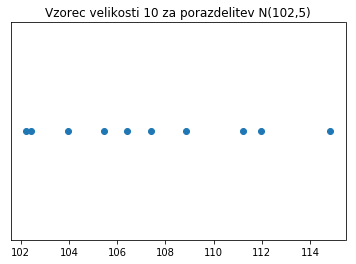

In [25]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(vzorec, np.zeros(len(vzorec)))
plt.title("Vzorec velikosti 10 za porazdelitev N(102,5)")
plt.yticks([])

##### Interval zaupanja za $\mu$
Ker smo predpostavili, da poznamo standardni odklon je polovična širina intervala enaka
$$
\Delta\!=\!\frac{\sigma\cdot t_{\frac{1+\beta}{2}}(\infty)}{\sqrt{n}}
$$
Tako vzorčno povprečje $\bar{x}$, kot tudi popravljen vzorčni standardni odklon $s$ lahko izračunamo po definiciji z osnovnimi python funkcijami.

In [26]:
n = len(vzorec) # velikost vzorca
x_p = sum(vzorec)/n # povprečje 
s = sqrt(sum((xi - x_p)**2 for xi in vzorec)/(n-1)) # popravljen vzorčni odklon
print("Vzorčno povprečje je {:.2f}".format(x_p))
print("Popravljen vzorčni standardni odklon je {:.2f}".format(s))

Vzorčno povprečje je 107.47
Popravljen vzorčni standardni odklon je 4.23


**Opomba**

Ker je pisanje definicij za vzorčni povprečje in standardni odklon zamudno, bomo v nadaljevanju raje uporabili funkciji `mean` in `stdev` iz knjižnice *statistics*.

In [27]:
from statistics import mean, stdev
print("Vzorčno povprečje in odklon izračunani s funkcijami iz knjižnice statistics")
mean(vzorec), stdev(vzorec)

Vzorčno povprečje in odklon izračunani s funkcijami iz knjižnice statistics


(107.47418219910817, 4.229589807860412)

Za širino intervala potrebujemo tudi kvantil standardne normalne porazdelitve za $\frac{1+\beta}{2}$.

In [28]:
qt = norm.ppf((1 + beta)/2)
print("Kvantil standardne normalne porazdelitve N(0,1) za verjetnost 0.975")
print("qt = {:.2f}".format(qt))

Kvantil standardne normalne porazdelitve N(0,1) za verjetnost 0.975
qt = 1.96


In [29]:
sigma = 5
delta = sigma*qt/sqrt(n) # polovična širina intervala
print("Interval zaupanja za povprečje")
[x_p - delta, x_p + delta]

Interval zaupanja za povprečje


[104.37520703758537, 110.57315736063097]

#### Porazdelitev vzorčnih povprečij
Generiraj 10000 naključnih vzorcev velikosti $10$ za $X$ in za vsakega izračunaj njegovo povprečje. Kolikšen procent povprečij pade v zgoraj izračunan interval zaupanja?

In [30]:
N = 10000 # število vzorcev
n = 10    # velikost vzorca
vzorec_x_p = [mean(X.rvs(10)) for i in range(N)]

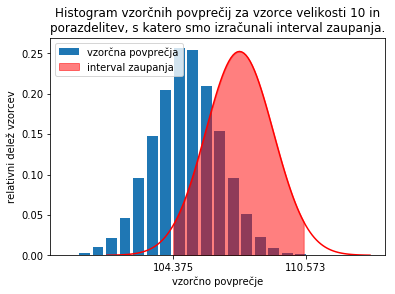

In [31]:
import matplotlib.pyplot as plt
plt.hist(vzorec_x_p, density=True, bins=20, rwidth=0.8, label="vzorčna povprečja")
plt.title("""Histogram vzorčnih povprečij za vzorce velikosti 10 in
porazdelitev, s katero smo izračunali interval zaupanja.""")
plt.xlabel("vzorčno povprečje")
plt.ylabel("relativni delež vzorcev")
import numpy as np
x = np.arange(x_p - 2*delta, x_p + 2*delta, 0.1)
plt.plot(x, norm.pdf(x, x_p, sigma/sqrt(n)), color='red', zorder=2)
x = np.arange(x_p - delta, x_p + delta, 0.1)
plt.fill_between(x, norm.pdf(x, x_p, sigma/sqrt(n)), alpha=0.5, color='red', zorder=2,
         label="interval zaupanja")
plt.xticks([x_p-delta, x_p+delta])
plt.legend()

Porazdelitev vzorčnih povprečij najlažje predstavimo s histogramom. Poleg histograma je na grafu še porazdelitev, ki smo jo uporabili za izračun **intervala zaupanja**. Za izračun intervala zaupanja smo uporabili porazdelitev, ki ima vrh v **vzorčnem povprečju** in ne v **pričakovani vrednosti** $\mu$. Zato se porazdelitev, s katero smo izračunali interval zaupanja ne ujema s histogramom vzorčnih povprečij.

Kolikšen procent povprečij pade v zgoraj izračunan interval zaupanja?

In [69]:
count = 0
for x in vzorec_x_p:
    if x > x_p - delta and x < x_p + delta:
        count +=1
print("Delež vzorcev, pri katerih je vzorčno povprečje znotraj izračunanega intervala")
print("{:.1f}%".format(100*count/N)) # delež vzorcev, za katere je 

Delež vzorcev, pri katerih je vzorčno povprečje znotraj izračunanega intervala
51.4%


Izračunani interval smo dobili na podlagi vzorčnega povprečja, ki pa se razlikuje od pravega povprečja. Zato je ta delež tako majhen. Na podlagi intervala zaupanja ne moremo nič povedati o verjetnosti, da je dejanski parameter $\mu$ znotraj intervala. Trdimo lahko le naslednje

> Če bi vzorčenje večkrat ponovili, bi **delež intervalov**,
> ki vsebujejo pravo vrednost parametra, konvergiral k $\beta$.

Več o [interpretaciji intervalov zaupanja](https://en.wikipedia.org/wiki/Confidence_interval#Meaning_and_interpretation).

##### Velikost vzorca
Koliko bi morala biti velikost vzorca, da bi pri istih vrednostih vzorčnih statistik, dobil interval 10 krat manjše širine?

In [112]:
# vzorci velikosti 10
# koliko bi morali vzeti velikost vzorca n, da bi bil interval 10x manjši

print("Da bi dobili 10x manjši interval, bi morali vzeti 100 krat večji vzorec.")

Da bi dobili 10x manjši interval, bi morali vzeti 100 krat večji vzorec.


## Naloga 2

Z merjenjem vzorca moških študentov (višine so v centimetrih) smo dobili naslednje podatke: 180, 183, 173, 171, 180, 183, 172, 178, 188, 175, 183, 179, 185, 195, 169.

Izračunaj interval zaupanja za povprečno višino moškega študenta pri stopnji zaupanja $\beta=0.9$. Pri tem si pomagaj z metodo iz_povprecje.

In [8]:
from scipy.stats import t # Studentova porazdelitev

def iz_povprecje(m, s, n, alpha):
    d = s*t(df=n-1).ppf(1 - alpha/2) / (n**0.5)
    return m - d, m + d

In [127]:
from statistics import mean, stdev
beta = 0.9
vzorec = [180, 183, 173, 171, 180, 183, 172, 178, 188, 175, 183, 179, 185, 195, 169]

([], <a list of 0 Text yticklabel objects>)

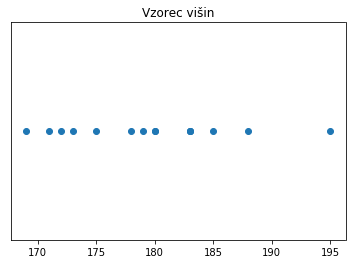

In [128]:
n = len(vzorec) # dolžina vzorca
plt.scatter(vzorec, np.zeros_like(vzorec))
plt.title("Vzorec višin")
plt.yticks([])

In [129]:
xp = mean(vzorec)
s = stdev(vzorec)
print("Vzorčno povprečje: {}".format(xp))
print("Vzorčni standardni odklon: {}".format(s))

Vzorčno povprečje: 179.6
Vzorčni standardni odklon: 6.987744373442078


In [131]:
# Interval zaupanja
from scipy.stats import t
qt = t.ppf((1 + beta)/2, n-1)
delta = s * qt/sqrt(n)
print("90% interval zaupanja: [{:.2f}, {:.2f}]".format(xp - delta, xp + delta))

90% interval zaupanja: [176.42, 182.78]


### Naloga

Naloži podatke iz datoteke [visine.csv](visine.csv) in določi $95\%$ interval zaupanja za povprečje za obe spremenljivki.

Za delo s podatki je zelo uporabna knjižnica [pandas](https://pandas.pydata.org/).

In [132]:
import pandas as pd
visine = pd.read_csv("podatki/visine.csv")
visine

weight  height
0       77     182
1       68     177
2       76     170
3       76     167
4       69     186
5       71     178
6       65     171
7       70     175
8       92     187
9       76     197
10     119     180
11      65     175
12      66     173
13     101     183
14      75     178
15      79     173
16      64     176
17      69     174
18      88     178
19      65     187
20      80     178
21      78     183
22      85     179
23      73     180
24      82     182
25      74     169
26     102     185
27      64     177
28      65     176
29      73     183
..     ...     ...
58      67     179
59      87     185
60      83     177
61      90     188
62      85     191
63      66     175
64      88     184
65      54     169
66      69     172
67      56     163
68      96     191
69      76     169
70      61     170
71      82     176
72      62     168
73      71     178
74      66     170
75      81     178
76      68     174
77      80     176
78      82     181
79      70     173
80      76     183
81      88     185
82      89     173
83      74     175
84      83     180
85      81     175
86      90     181
87      79     177

[88 rows x 2 columns]

S knjižnico pandas lahko preprosto izpišemo osnovne statistike za dane podatke.

In [133]:
visine.describe()

weight      height
count   88.000000   88.000000
mean    75.897727  178.011364
std     11.890342    6.440701
min     54.000000  163.000000
25%     67.750000  173.000000
50%     75.000000  178.000000
75%     83.000000  183.000000
max    119.000000  197.000000

Posamezne stolpce lahko dobimo kot atribute razreda `DataFrame`.

In [135]:
visina = visine.height
teza = visine.weight

Interval zaupanja lahko dobimo tudi z `scipy.stats` objekti za porazdelitve. Porazdelitev vzorčnih povprečij je namreč enaka Studentovi porazdelitvi
$$
t\left(n-1, \mu, \frac{\sigma}{\sqrt{n}}\right)
$$
Ker pravih $\mu$ in $\sigma$ ne poznamo, za interval zaupanja uporabimo porazdelitev
$$
t\left(n-1, \bar{x}, \frac{s}{\sqrt{n}}\right)
$$
pri kateri smo $\mu$ nadomestili z vzorčnim povprečje $\bar{x}$ in $\sigma$ z vzorčnim odklonom $s$.

In [176]:
beta = 0.95
n = visina.count() # velikost vzorca
x_p = visina.mean() # vzorčno povprečje
s = visina.std() # vzorčni odklon
t.interval(beta, n-1, loc=xp, scale=s/sqrt(n)) # interval zaupanja

(74.53307314711928, 77.26238139833525)

In [175]:
# interval zaupanja za povprečje teže
xp = teza.mean()
s = teza.std()
t.interval(beta, n-1, loc=xp, scale=s/sqrt(n))

(73.37840459945285, 78.41704994600168)

# Testiranje domnev
Postopek za testiranje domnev je sledeč.
 1. Postavimo ničelno in alternativno domnevo $H_0$ in $H_a$.
 2. Zberemo podatke in izračunamo testno statistiko (TS).
 3. Določimo kritično območje za testno statistiko.
 4. Sklepamo.
 
## Naloga 3

Preveriti želimo, ali je povprečna telesna višina moškega študenta enaka $180$cm za stopnjo značilnosti $\alpha=0.1$. Postavimo dve domnevi
 * ničelno domnevo: $H_0: \mu=180$cm
 * alternativno domnevo: $H_a: \mu \not=180$cm
 
s testom bomo preverili, kako se ničelna domneva ujema z zbranimi podatki.

### Testna statistika
Če testiramo $H_0: \mu = \mu_0$, potem je testna statistika ena od naslednjih možnosti:
 * če $\sigma$ ne poznamo $$TS = \frac{\bar{x}-\mu_0}{s}\sqrt{n}\sim t(n-1),$$
 * če $\sigma$ poznamo $$TS = \frac{\bar{x}-\mu_0}{\sigma}\sqrt{n}\sim N(0,1).$$
 
V našem primeru $\sigma$ ni poznan, zato uporabimo prvo testno statistiko.

In [ ]:
from math import sqrt
mu_0 = 180
vzorec = [180, 183, 173, 171, 180, 183, 172, 178, 188, 175, 183, 179, 185, 195, 169]
s = stdev(vzorec)
xp = mean(vzorec)
n = len(vzorec)
TS = ...
TS

#### Kritično območje
Kritično območje je interval „nenavadnih vrednosti“ za dano porazdelitev. Kritično območje je odvisno od stopnje značilnosti $\alpha$.
 * dvostranski test $H_a: \mu\not=\mu_0$ je kritično območje $(-\infty, -w_k] \cup [w_k, \infty)$
 * za enostranski test $Ha: \mu>\mu_0$ je kritično območje $[w_k, \infty)$
 
Rob kritičnega območja $w_k$ določimo kot kvantil za
 * dvostranski test: kvatnil za $1-\frac{\alpha}{2}$ se pravi $w_k = t_{1-\frac{\alpha}{2}}(n-1)$
 * enostranski test: kvantil za $1-\alpha$ se pravi $w_k = t_{1-\alpha}(n-1)$.
 
V našem primeru uporabimo dvostranski test.

In [ ]:
from scipy.stats import t 

alfa = ...
wk = t.ppf(...)
print("Kritično območje: (-neskončno, {}] U [{}, neskončno)".format(-wk,wk))

### Sklep

 * Če je testna statistika v kritičnem območju $TS\in W_k$, potem $H_0$ zavrnemo v prid $H_a$
 * Če testna statistika ni v kritičnem območju, potem $H_0$ ne moremo zavrniti (podatki so skladni s $H_0$)

In [ ]:
TS <= -wk or TS >= wk

__Kaj torej naredimo v našem primeru?__

Za katero povprečno višino bi našo ničelno hipotezo zavrnili?

### Naloga 4
Slučajna spremenljivka $X$ na populaciji ima porazdelitev $N(\mu, \sigma)$. Na vzorcu velikosti
$n=121$ smo izračunali vzorčno povprečje $x=12.24$ in vzorčni odklon $s=0.6$.

Določi interval zaupanja za $\mu$ pri $\alpha=0.05$.

In [74]:
m = 12.24
s = 0.6
n = 121
alpha = 0.05

Pogledamo ustrezni kvantil ($1-\frac{\alpha}{2}$) studentove $t$ porazdelitve pri $n-1$ prostostnih stopnjah. Nato uporabimo ustrezno formulo.

In [ ]:
from scipy.stats import t
kvantil = t(df=n-1).ppf(...)
d = ...

Določi interval zaupanja za $\mu$ pri $\alpha=0.1$. 

Kateri izmed intervalov bo širši? Zakaj?

In [ ]:
alpha = 0.1
d = ...
m-d, m+d

Naredi enako še z uporabo metode iz_povprecje. Preveri, da se rezultati ujemajo.

In [ ]:
iz_povprecje(...)

In [ ]:
iz_povprecje(...)

Preveri hipotezo, da je povprečna vrednost spremenljivke $X$ enaka 12.135. To naredi pri stopnjah zaupanja $\beta=0.95$ in $\beta=0.9$. Kaj opaziš? Kako so kritična območja povezana z intervali zaupanja? 

### Naloga 5
Statistični urad želi določiti povprečni čas študija slovenskih študentov. 

Anketirali so vzorec 10 študentov ob zaključku študija in dobili naslednje podatke o trajanju
študija (v letih): 5, 6, 10, 10, 9, 7, 8, 8, 9, 8.

Izračunaj vzorčno povprečje $\overline{x}$ in vzorčni odklon $s$.

In [ ]:
from statistics import mean, stdev
sample = [5, 6, 10, 10, 9, 7, 8, 8, 9, 8]
m = ...
s = ...
n = len(sample)
print("Povprečje: {}".format(m))
print("Standardni odklon: {}".format(s))

S stopnjo zaupanja $0.95$ določi interval zaupanja za povprečno dolžino študija. Pri reševanju si pomagamo s funkcijo, ki smo jo definirali v prvi nalogi.

In [ ]:
iz_povprecje(...)

Pri stopnji značilnosti $\alpha=0.05$ testiraj hipotezo, da je povprečni čaš študija naših študentov enak 10 let.

In [ ]:
...

### Interval zaupanja za $\sigma$

Ocenjujemo parameter $\sigma$ pri porazdelitvi $X\!\sim\!\mathrm{N}(\mu,\sigma)$, kjer parameter $\mu$ ni znan.

Izračunamo 
$$\overline{x}\!=\!\frac{x_1+\ldots+x_n}{n},$$

$$c_1\!=\!\chi^2_{(1-\beta)/2}(n\!-\!1),$$

$$c_2\!=\!\chi^2_{(1+\beta)/2}(n\!-\!1),$$

$$s\!=\!\sqrt{\frac{(x_1-\overline{x})^2+\ldots+(x_n-\overline{x})^2}{n-1}}.$$


Interval zaupanja za $\sigma$ je
$$
[s\sqrt{\frac{n-1}{c_2}}, s\sqrt{\frac{n-1}{c_1}}]
$$

### Naloga 4

Iz vzorca moči $n = 20$ smo dobili vzorčni odklon $s = 0.7$. Poišči interval zaupanja
za odklon $\sigma$ pri stopnji zaupanja $0.95$, nato pa še pri stopnji zaupanja $0.99$. Kaj
opaziš? 

Pri reševanju naloge bomo najprej zapisali metodo iz_odklon, ki nam vrne interval zaupanja za standardni odklon.

In [16]:
from scipy.stats import chi2

def iz_odklon(s, n, alpha):
    return s * ((n-1) / chi2(df=n-1).ppf(1-alpha/2))**0.5, s * ((n-1) / chi2(df=n-1).ppf(alpha/2))**0.5

In [ ]:
print("Interval zaupanja pri stopnji zaupanja 0.95")
iz_odklon(...)

In [ ]:
print("Interval zaupanja pri stopnji zaupanja 0.99")
iz_odklon(...)

Pri stopnji značilnosti $\alpha=0.05$ in nato še $\alpha=0.01$ testiraj hipotezo, da je $\sigma$ enak $1.1$.

### 1. Postavimo domneve

 * ničelna domneva: $H_0: \sigma=1.1$
 * alternativna domneva $H_a: \sigma \neq 1.1$

### 2. Testna statistika TS
$TS = (n-1)\frac{s^2}{\sigma_0^2}\sim \chi^2(n-1)$ 

In [ ]:
sigma_0 = 1.1
s = 0.7
n = 20
alfa = 0.01
TS = ...
print("Vrednost testne statistike je {}".format(TS))

#### 3. Kritično območje
Kritično območje je interval $[-\infty, \chi^2_{\frac{\alpha}{2}}(n-1)) \cup [\chi^2_\frac{1 - \alpha}{2}(n-1), \infty]$.

In [ ]:
from scipy.stats import chi2
M = chi2.ppf(..., n-1)
m = chi2.ppf(..., n-1)
print(f"Kritično območje je [-oo, {m}] U [{M}, oo]".format(m, M))

### Interval zaupanja za delež

Naj bo $p$ neznan delež enot v populaciji z neko lastnostjo. Vzamemo reprezentativen vzorec $n\!>\!30$ enot, izmed katerih jih ima $k$ dano lastnost. Torej je vzorčni delež $\hat{p}\!=\!\frac{k}{n}$. Izračunamo
$$
\Delta\!=\!z_{(1+\beta)/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}.
$$ 

Interval zaupanja je delež $p$ je enak $[\hat{p} - \Delta, \leq \hat{p}\!+\!\Delta]$.

### Naloga 5

V slučajnem vzorcu 500 državljanov RS je bilo 452 desničarjev, in 48 levičarjev.
Oceni delež levičarjev med Slovenci s 95% natančnostjo. 

Najprej bomo sestavili metodo iz_delez, ki vam vrne interval zaupanja za delež pri podani velikosti vzorca, številu enot v vzorcu z dano lastnostjo in dano stopnjo zaupanja.

In [21]:
from scipy.stats import norm

def iz_za_delez(n, k, alpha):
    vp = k/n
    d = norm.ppf(1-alpha/2)*(vp*(1-vp)/n)**0.5
    return vp - d, vp + d

In [ ]:
iz_za_delez(...)

Pri stopnji značilnosti $\alpha=0.05$ testiraj hipotezo, da je delež levičarjev enak 6\%.

### Postavimo domneve
 * $H_0: p_l = 0.06$
 * $H_a: p_l \neq 0.06$

### 2. Testna statistika
Za delež je TS

$$TS = (p-p_0)\sqrt{\frac{n}{p_0(1-p_0)}}\sim N(0,1)$$

In [ ]:
n = 500
alfa = 0.05
l = 48
TS = ...
TS

### Kritično območje

Ker je testna statistina porazdeljena standardno normalno, je kritično območje kar enako kot pri dvostranskem testu za povprečje.

In [ ]:
wk = norm.ppf(...)
print("Kritično območje: (-neskončno, {}] U [{}, neskončno)".format(-wk,wk))

### Naloga 6

V anketi je sodelovalo 1112 ljudi. Od teh jih je 701 menilo, da predsednik dobro
opravlja svoje delo. Poišči 95% interval zaupanja za delež ljudi, ki menijo, da
predsednik dela dobro.

In [ ]:
iz_za_delez(...)

## Naloga 7

Naloži podatke za `quakes` iz [podatkovih nizov v R](https://vincentarelbundock.github.io/Rdatasets/datasets.html) in generiraj vzorce dolžin $n=15, 50, 100$ za globino. Za omenjene vzorce določi intervale zaupanja za povprečno globino potresa s stopnjo zaupanja $\beta=0.95$,

 * če uporabiš vzorčni standardni odklon in
 * če uprabiš standardni odklon za celotni podatkovni niz.
 
Primerjaj interval zaupanja s povprečjem za ves podatkovni niz.